<a href="https://colab.research.google.com/github/dk3059/Machine-Learning/blob/main/1_1_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%B6%84%EB%A5%98%EB%AA%A8%ED%98%95_US_Election_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. 데이터 준비

### 데이터 사용 파일
 - president_country_candidate.csv : 대통령 투표 결과
 - governors_country_candidate.csv : 카운티 자사 투표 결과
 - senate_country_candidate.csv : 상원의원 투표 결과
 - house_candidate.csv : 하원의원 투표 결과




 ### 컬럼 설명
  - state : 주
  - country : 카운티(군)
  - district : 지구
  - candidate : 후보자
  - party : 후보자의 소속 정당
  - total_votes : 득표 수
  - won : 지역 투표 우승 여부

In [8]:
!pip install geopandas
!pip install pyshp
!pip install shapely
!pip install plotly-geo

     |████████████████████████████████| 1.0MB 7.3MB/s 
     |████████████████████████████████| 6.5MB 18.1MB/s 
     |████████████████████████████████| 15.3MB 246kB/s 
     |████████████████████████████████| 92kB 8.7MB/s 
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0
     |████████████████████████████████| 225kB 6.7MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=7d46473314ddf2fa6b73e31b94aaab7b80d0c4b2eba5ee2a21fbd7be247edf1a
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp
     |████████████████████████████████| 23.7MB 1.4MB/s 


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import os

In [12]:
!kaggle datasets download -d unanimad/us-election-2020
!kaggle datasets download -d muonneutrino/us-census-demographic-data

  0% 0.00/429k [00:00<?, ?B/s]
100% 429k/429k [00:00<00:00, 63.3MB/s]
 47% 5.00M/10.6M [00:00<00:00, 40.5MB/s]
100% 10.6M/10.6M [00:00<00:00, 67.7MB/s]


In [13]:
!unzip '*.zip'

Archive:  us-election-2020.zip
  inflating: governors_county.csv    
  inflating: governors_county_candidate.csv  
  inflating: governors_state.csv     
  inflating: house_candidate.csv     
  inflating: house_state.csv         
  inflating: president_county.csv    
  inflating: president_county_candidate.csv  
  inflating: president_state.csv     
  inflating: senate_county.csv       
  inflating: senate_county_candidate.csv  
  inflating: senate_state.csv        

Archive:  us-census-demographic-data.zip
  inflating: acs2015_census_tract_data.csv  
  inflating: acs2015_county_data.csv  
  inflating: acs2017_census_tract_data.csv  
  inflating: acs2017_county_data.csv  

2 archives were successfully processed.


In [67]:
# US Election 2020
df_pres = pd.read_csv('president_county_candidate.csv')
df_gov = pd.read_csv('governors_county_candidate.csv')

#US Census 2017
df_census = pd.read_csv('acs2017_county_data.csv')

In [68]:
#State Code 관련 부가 자료
state_code = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')[0]

##1. EDA

In [69]:
df_pres.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In [70]:
df_pres['candidate'].unique()

array(['Joe Biden', 'Donald Trump', 'Jo Jorgensen', 'Howie Hawkins',
       ' Write-ins', 'Gloria La Riva', 'Brock Pierce',
       'Rocky De La Fuente', 'Don Blankenship', 'Kanye West',
       'Brian Carroll', 'Ricki Sue King', 'Jade Simmons',
       'President Boddie', 'Bill Hammons', 'Tom Hoefling',
       'Alyson Kennedy', 'Jerome Segal', 'Phil Collins',
       ' None of these candidates', 'Sheila Samm Tittle', 'Dario Hunter',
       'Joe McHugh', 'Christopher LaFontaine', 'Keith McCormic',
       'Brooke Paige', 'Gary Swing', 'Richard Duncan', 'Blake Huber',
       'Kyle Kopitke', 'Zachary Scalf', 'Jesse Ventura', 'Connie Gammon',
       'John Richard Myers', 'Mark Charles', 'Princess Jacob-Fambro',
       'Joseph Kishore', 'Jordan Scott'], dtype=object)

In [71]:
df_gov.head()

,state,county,candidate,party,votes,won
0,Delaware,Kent County,John Carney,DEM,44352,True
1,Delaware,Kent County,Julianne Murray,REP,39332,False
2,Delaware,Kent County,Kathy DeMatteis,IPD,1115,False
3,Delaware,Kent County,John Machurek,LIB,616,False
4,Delaware,New Castle County,John Carney,DEM,191678,True


In [72]:
df_census.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [73]:
df_census['County'].value_counts()

Washington County     30
Jefferson County      25
Franklin County       24
Jackson County        23
Lincoln County        23
                      ..
Duplin County          1
Denton County          1
Toa Alta Municipio     1
Habersham County       1
Davison County         1
Name: County, Length: 1955, dtype: int64

In [74]:
state_code.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [75]:
# 모든 데이터프레임의 index를 country로 변경하기

data = df_pres.loc[df_pres['party'].apply(lambda s : str(s) in ['DEM', 'REP'])] #민주당, 공화당만 남기기
table_pres = pd.pivot_table(data=data, index = ['state', 'county'], columns = 'party', values='total_votes')
table_pres.rename({'DEM': 'Pres_DEM', 'REP':'Pres_REP'}, axis=1, inplace=True)
table_pres.isna().sum()

party
Pres_DEM    0
Pres_REP    0
dtype: int64

In [76]:
table_pres.head()

party                   Pres_DEM  Pres_REP
state   county                            
Alabama Autauga County      7503     19838
        Baldwin County     24578     83544
        Barbour County      4816      5622
        Bibb County         1986      7525
        Blount County       2640     24711

In [77]:
data = df_gov.loc[df_gov['party'].apply(lambda s : str(s) in ['DEM', 'REP'])]
table_gov = pd.pivot_table(data=data, index=['state', 'county'], columns='party', values='votes') #지역별 투표수
table_gov.rename({'DEM': 'gov_DEM', 'REP':'gov_REP'}, axis=1, inplace=True)
table_gov

party                            gov_DEM  gov_REP
state         county                             
Delaware      Kent County          44352    39332
              New Castle County   191678    82545
              Sussex County        56873    68435
Indiana       Adams County          2143     9441
              Allen County         53895    98406
...                                  ...      ...
West Virginia Webster County         659     2552
              Wetzel County         1727     4559
              Wirt County            483     1947
              Wood County           9933    26232
              Wyoming County        1240     6941

[1025 rows x 2 columns]

In [78]:
df_census.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [79]:
df_census.rename({'State' : 'state', 'County' : 'county'}, axis=1, inplace=True)
df_census.drop('CountyId', axis=1, inplace=True)
df_census.set_index(['state', 'county'], inplace=True)
df_census.head()

TotalPop    Men  ...  FamilyWork  Unemployment
state   county                           ...                          
Alabama Autauga County     55036  26899  ...         0.1           5.2
        Baldwin County    203360  99527  ...         0.1           5.5
        Barbour County     26201  13976  ...         0.3          12.4
        Bibb County        22580  12251  ...         0.3           8.2
        Blount County      57667  28490  ...         0.1           4.9

[5 rows x 34 columns]

In [80]:
df_census.columns

Index(['TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native',
       'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment'],
      dtype='object')

In [81]:
df_census.drop(['Income', 'IncomeErr', 'IncomePerCapErr'], axis=1, inplace=True)

In [82]:
# 다중공성선 피하기
df_census.drop('Women', axis=1, inplace=True)
df_census['Men'] /= df_census['TotalPop']
df_census['VotingAgeCitizen'] /= df_census['TotalPop']
df_census['Employed'] /= df_census['TotalPop']

In [83]:
df_census.head()

TotalPop       Men  ...  FamilyWork  Unemployment
state   county                              ...                          
Alabama Autauga County     55036  0.488753  ...         0.1           5.2
        Baldwin County    203360  0.489413  ...         0.1           5.5
        Barbour County     26201  0.533415  ...         0.3          12.4
        Bibb County        22580  0.542560  ...         0.3           8.2
        Blount County      57667  0.494043  ...         0.1           4.9

[5 rows x 30 columns]

In [84]:
# df_pres, df_gov, df_census 데이터프레임 합치기
df = pd.concat([table_pres, table_gov, df_census], axis=1)

In [85]:
df.head()

Pres_DEM  Pres_REP  ...  FamilyWork  Unemployment
state   county                              ...                          
Alabama Autauga County    7503.0   19838.0  ...         0.1           5.2
        Baldwin County   24578.0   83544.0  ...         0.1           5.5
        Barbour County    4816.0    5622.0  ...         0.3          12.4
        Bibb County       1986.0    7525.0  ...         0.3           8.2
        Blount County     2640.0   24711.0  ...         0.1           4.9

[5 rows x 34 columns]

In [ ]:
df

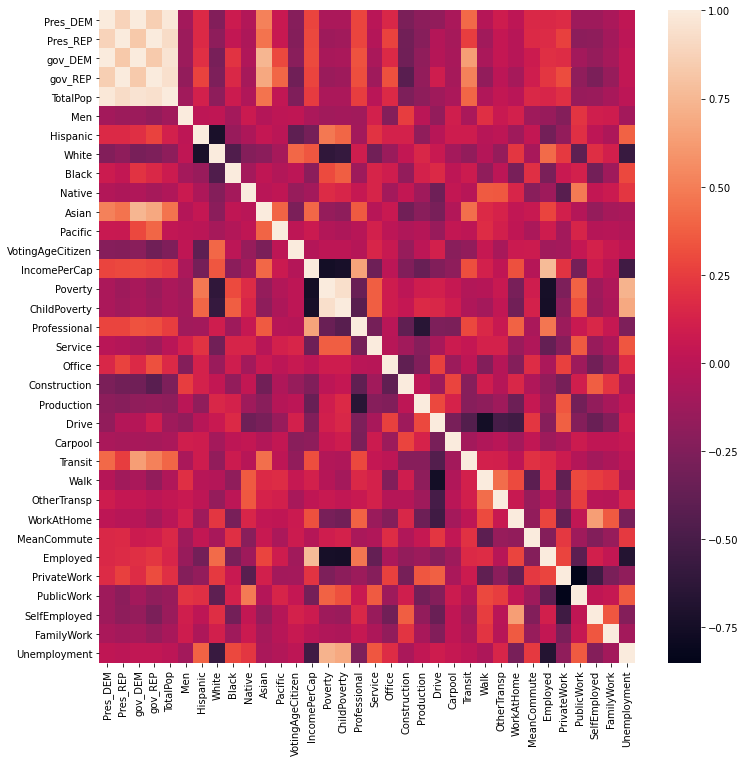

In [86]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화
plt.figure(figsize = (12,12))
sns.heatmap(df.corr())

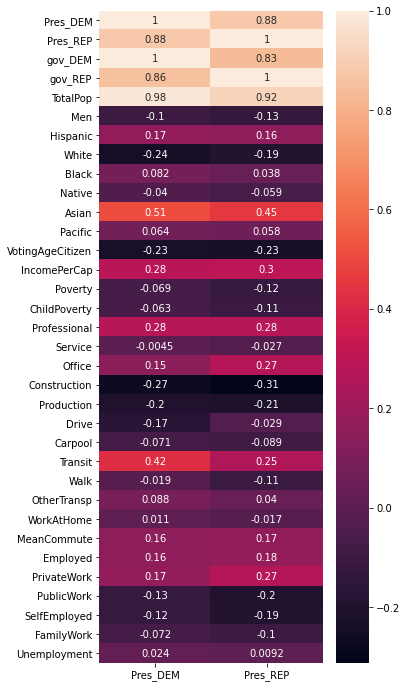

In [87]:
plt.figure(figsize=(5,12))
sns.heatmap(df.corr()[['Pres_DEM', 'Pres_REP']], annot=True)

In [94]:
# 인구 수에 의해 상관관계가 높아지기 때문에 비율로 변경
df_norm = df.copy()

df_norm['Pres_DEM'] /= df['Pres_DEM'] + df['Pres_REP']
df_norm['Pres_REP'] /= df['Pres_DEM'] + df['Pres_REP']
df_norm['gov_DEM'] /= df['gov_DEM'] + df['gov_REP']
df_norm['gov_DEM'] /= df['gov_DEM'] + df['gov_REP']

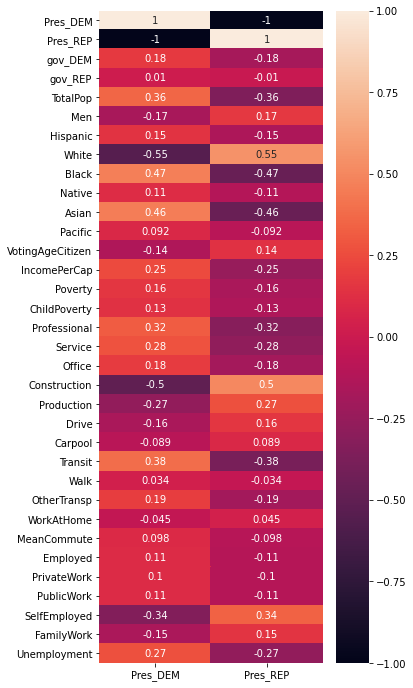

In [95]:
plt.figure(figsize=(5,12))
sns.heatmap(df_norm.corr()[['Pres_DEM', 'Pres_REP']], annot=True)

 ### 상관관계를 통해 알 수 있는 점
 - 인구 수가 높을수록 민주당 지지
 - 백인이 높을 수록 공화당 지지
 - 흑인/아시아인이 높을 수록 민주당 지지
 - 공화당에 의해서 건설업이 반사이익
 - 실업율이 높을 수록 민주당 지지

In [ ]:
# 연관성이 높은 데이터 jointplot 확인

sns.jointplot(x='White', y='Pres_REP', hue = 'Professional', data=df_norm, alpha=0.8)

 ### 알 수 있는 점
 - 백인 비율이 높더라도 전문직 종사자가 많을수록 민주당을 지지

In [ ]:
sns.jointplot(x='Black', y='Pres_DEM', hue = 'Professional', data=df_norm, alpha=0.2)

 ### 알 수 있는 점
 - 흑인 비율이 높을수록 민주당 지지
 - 흑인 비율이 낮더라도 전문직 종사자가 많을 수록 민주당 지지

In [112]:
#데이터 시각화

import plotly.figure_factory as ff

#FIPS 코드 불러오기
df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/laucnty16.csv')
df_sample['State FIPS Code'] = df_sample['State FIPS Code'].apply(lambda x : str(x).zfill(2))
df_sample['County FIPS Code'] = df_sample['County FIPS Code'].apply(lambda x : str(x).zfill(3))
df_sample['FIPS'] = df_sample['State FIPS Code'] + df_sample['County FIPS Code']

#Color Scale 세팅
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef",
            "#b3d2e9", "#9ecae1", "#85bcdb", "#6baed6", "#57a0ce",
            "#4292c6", "#3082be", "#2171b5", "#1361a9", "#08519c",
            "#0b4083","#08306b"]

In [113]:
df_sample.head()

,LAUS Code,State FIPS Code,County FIPS Code,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemployment Rate (%),FIPS
0,CN0100100000000,01,001,"Autauga County, AL",2016,"25,649","24,297","1,352",5.3,01001
1,CN0100300000000,01,003,"Baldwin County, AL",2016,"89,931","85,061","4,870",5.4,01003
2,CN0100500000000,01,005,"Barbour County, AL",2016,"8,302","7,584",718,8.6,01005
3,CN0100700000000,01,007,"Bibb County, AL",2016,"8,573","8,004",569,6.6,01007
4,CN0100900000000,01,009,"Blount County, AL",2016,"24,525","23,171","1,354",5.5,01009


In [114]:
state_code.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [116]:
# 데이터 형식 변환

state_map = state_code.set_index('State/District')['Postal Code']

In [139]:
df_norm.reset_index()['state']

0       Alabama
1       Alabama
2       Alabama
3       Alabama
4       Alabama
         ...   
4804    Wyoming
4805    Wyoming
4806    Wyoming
4807    Wyoming
4808    Wyoming
Name: state, Length: 4809, dtype: object

In [117]:
df_norm.reset_index()['county'] + ', ' + df_norm.reset_index()['state'].map(state_map)

,state,county,Pres_DEM,Pres_REP,gov_DEM,gov_REP,TotalPop,Men,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,IncomePerCap,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,Autauga County,0.274423,0.725577,NaN,NaN,55036.0,0.488753,2.7,75.4,18.9,0.3,0.9,0.0,0.745258,27824.0,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,0.438113,74.1,20.2,5.6,0.1,5.2
1,Alabama,Baldwin County,0.227317,0.772683,NaN,NaN,203360.0,0.489413,4.4,83.1,9.5,0.8,0.7,0.0,0.764044,29364.0,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,0.440239,80.7,12.9,6.3,0.1,5.5
2,Alabama,Barbour County,0.461391,0.538609,NaN,NaN,26201.0,0.533415,4.2,45.7,47.8,0.2,0.6,0.0,0.773596,17561.0,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,0.338842,74.1,19.1,6.5,0.3,12.4
3,Alabama,Bibb County,0.208811,0.791189,NaN,NaN,22580.0,0.542560,2.4,74.6,22.0,0.4,0.0,0.0,0.782197,20911.0,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,0.361869,76.0,17.4,6.3,0.3,8.2
4,Alabama,Blount County,0.096523,0.903477,NaN,NaN,57667.0,0.494043,9.0,87.4,1.5,0.3,0.1,0.0,0.737215,22021.0,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,0.370749,83.9,11.9,4.0,0.1,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,Wyoming,Sweetwater County,0.238163,0.761837,NaN,NaN,44527.0,0.516114,16.0,79.6,0.8,0.6,0.6,0.5,0.696768,31700.0,12.0,15.7,27.7,16.1,20.0,20.8,15.4,77.5,14.4,2.6,2.8,1.3,1.5,20.5,0.510679,78.4,17.8,3.8,0.0,5.2
4805,Wyoming,Teton County,0.694059,0.305941,NaN,NaN,22923.0,0.530864,15.0,81.5,0.5,0.3,2.2,0.0,0.728177,49200.0,6.8,2.8,39.4,25.4,17.0,11.7,6.5,68.3,6.7,3.8,11.7,3.8,5.7,14.3,0.632203,82.1,11.4,6.5,0.0,1.3
4806,Wyoming,Uinta County,0.175085,0.824915,NaN,NaN,20758.0,0.510309,9.1,87.7,0.1,0.9,0.1,0.0,0.685760,27115.0,14.9,20.0,30.4,19.4,18.1,16.1,16.1,77.4,14.9,3.3,1.1,1.3,2.0,19.9,0.459004,71.5,21.5,6.6,0.4,6.4
4807,Wyoming,Washakie County,0.167094,0.832906,NaN,NaN,8253.0,0.498970,14.2,82.2,0.3,0.4,0.1,0.0,0.742154,27345.0,12.8,17.5,32.1,16.3,17.6,18.8,15.3,77.2,10.2,0.0,6.9,1.3,4.4,14.3,0.464437,69.8,22.0,8.1,0.2,6.1
